
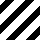
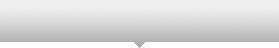
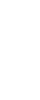
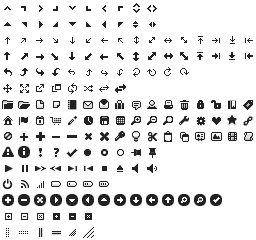
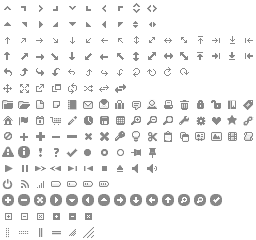
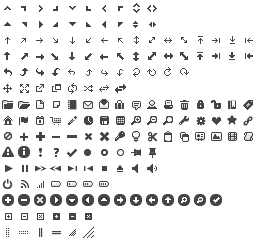
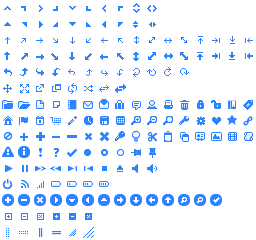
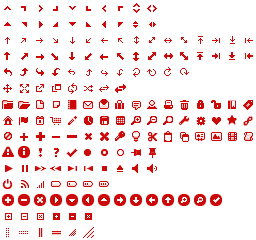
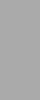
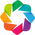
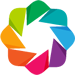
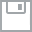
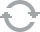
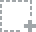
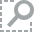
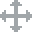
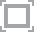
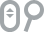

In [1]:
# Our numerical workhorses
import numpy as np
import scipy.integrate

# Import pyplot for plotting
import matplotlib.pyplot as plt

# Seaborn, useful for graphics
import seaborn as sns

# Import Bokeh modules for interactive plotting
import bokeh.io
import bokeh.mpl
import bokeh.plotting

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# This enables SVG graphics inline.  There is a bug, so uncomment if it works.
# %config InlineBackend.figure_formats = {'svg',}

# This enables high resolution PNGs. SVG is preferred, but has problems
# rendering vertical and horizontal lines
%config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 1, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5', 
      'lines.markerstyle': None}
sns.set_context('notebook', rc=rc)
sns.set_style('darkgrid', rc=rc)

# Set up Bokeh for inline viewing
bokeh.io.output_notebook()

First, let's define the functions. 

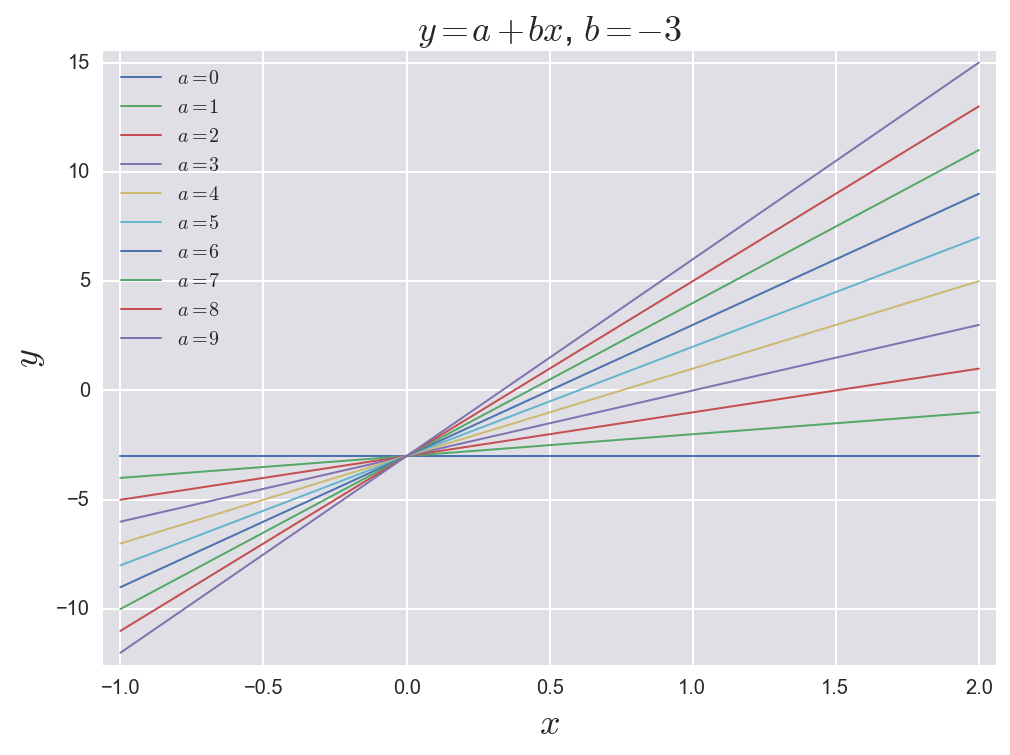

In [2]:
# Example
def lin_func(p, x):
    """
    Returns `p`[0] * `x` + `p`[1].
    """
    a, b = p
    return a * x + b

# Make a set of evenly spaced points in x
x = np.linspace(-1.0, 2.0, 50)

# Plot several lines with varying a values
# Initialise legend list
legend_list = []
for i in range(10):
    plt.plot(x, lin_func(np.array([i, -3]), x))
    legend_list.append(r'$a = {}$'.format(i))
plt.margins(x=0.02, y=0.02)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');
plt.legend(legend_list, loc='best')
plt.title('$y = a + bx$, $b = -3$')


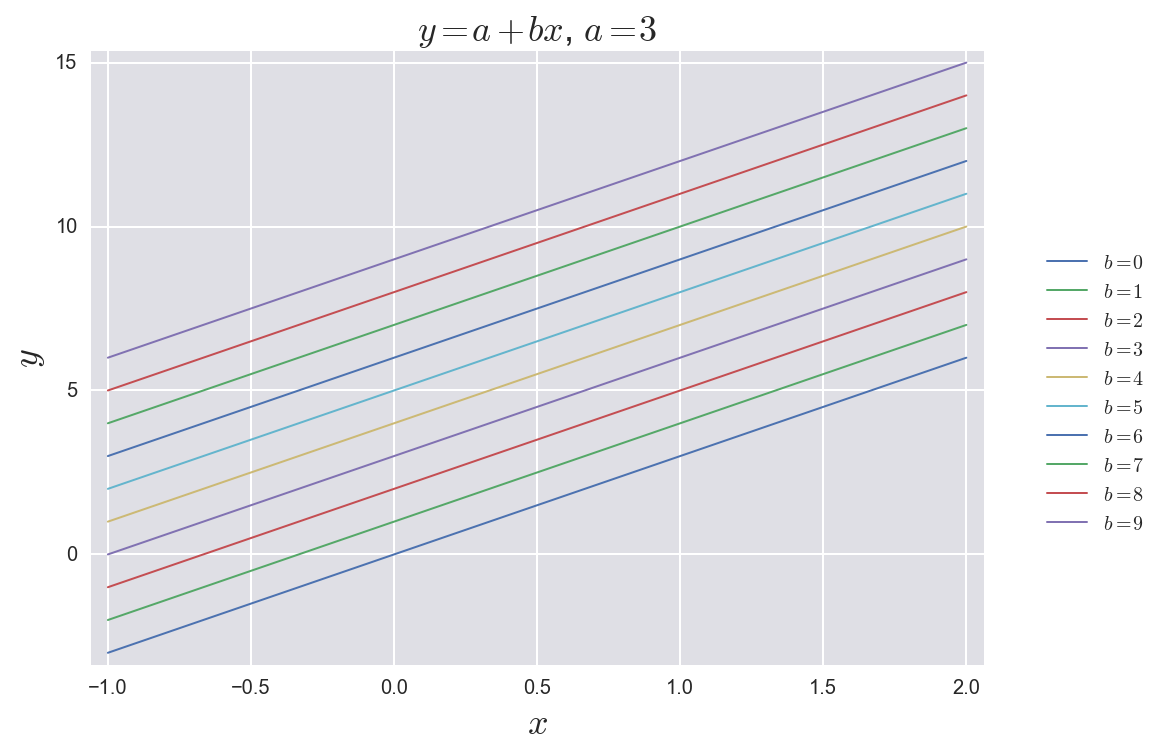

In [3]:
# Plot several lines with varying b values
# Initialise legend list
legend_list = []
for i in range(10):
    plt.plot(x, lin_func(np.array([3, i]), x))
    legend_list.append(r'$b = {}$'.format(i))
plt.margins(x=0.02, y=0.02)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');
# Legend no longer fits in graph
plt.legend(legend_list, bbox_to_anchor=(1.2, 0.7))
plt.title('$y = a + bx$, $a = 3$')

We have verified that for a linear function, changing 'a' affects the slope and changing 'b' affects the intercept.

## 1.2a Exponential decay and background signal

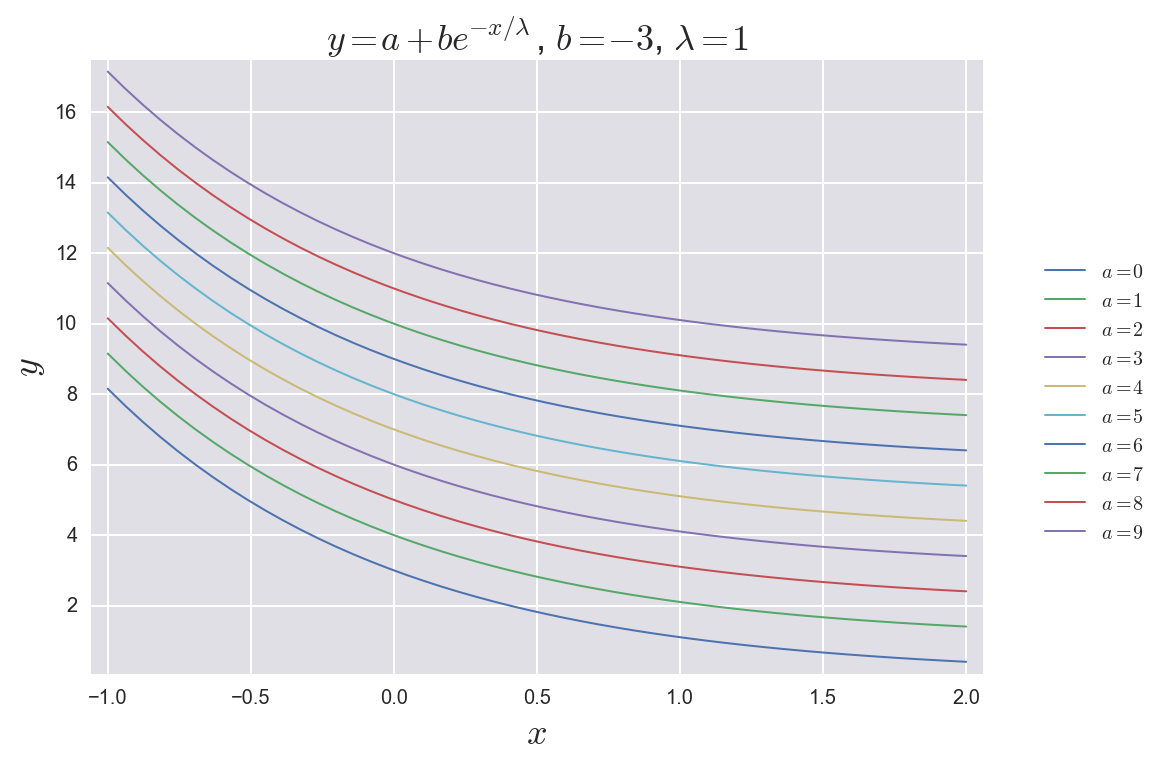

In [4]:
# 1.2a Exponential decay and background signal 
# y=a+b*exp(−x/λ)
def exp_decay(p,x):
    '''
    Returns the value(s) of the exponential decay with background signal at x. 
    '''
    a,b,lam = p
    return a + b*np.exp(-x/lam)

# Plot several lines with varying a values
# Initialise legend list
legend_list = []
for i in range(10):
    plt.plot(x, exp_decay(np.array([i, 3, 1]), x))
    legend_list.append(r'$a = {}$'.format(str(i)))
plt.margins(x=0.02, y=0.02)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(legend_list, bbox_to_anchor=(1.2, 0.7))
plt.title('$y = a + be^{-x/\lambda}$, $b = -3$, $\lambda = 1$')

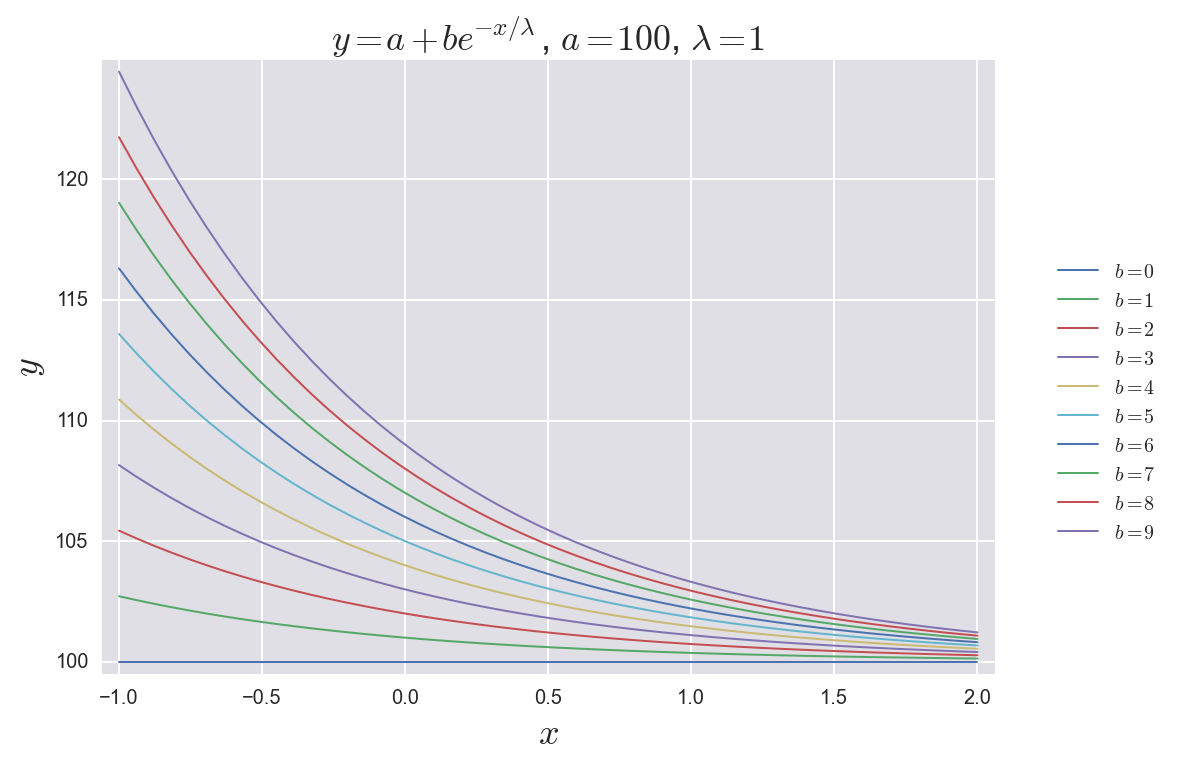

In [5]:
# Plot several lines with varying b values
# Initialise legend list
legend_list = []
for i in range(10):
    plt.plot(x, exp_decay(np.array([100 , i, 1]), x))
    legend_list.append(r'$b = {}$'.format(i))
plt.margins(x=0.02, y=0.02)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(legend_list, bbox_to_anchor=(1.2, 0.7))
plt.title('$y = a + be^{-x/\lambda}$, $a = 100$, $\lambda = 1$')

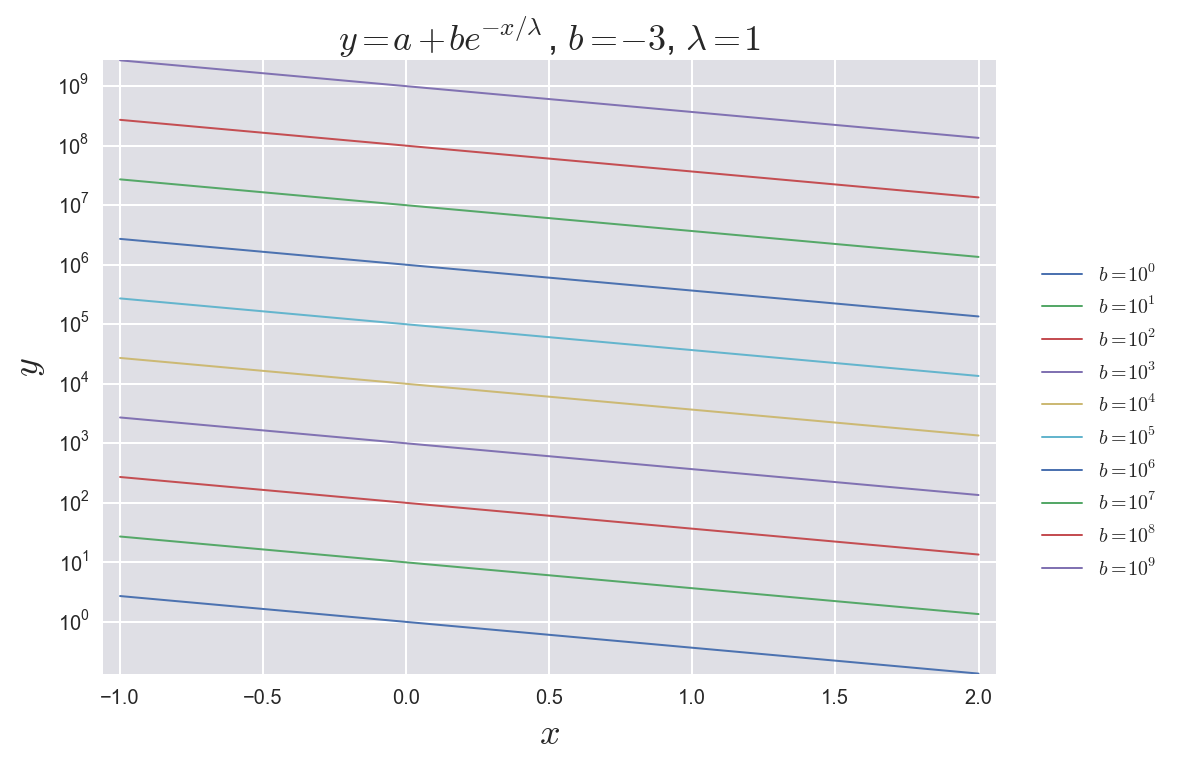

In [6]:
# Plot several lines with varying b values
# Initialise legend list
legend_list = []
for i in range(10):
    plt.semilogy(x, exp_decay(np.array([0, 10**i, 1]), x))
    legend_list.append('$b = 10^{}$'.format(str(i)))
plt.margins(x=0.02, y=0.02)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(legend_list, bbox_to_anchor=(1.2, 0.7))
plt.title('$y = a + be^{-x/\lambda}$, $b = -3$, $\lambda = 1$')

A semilog plot makes it easy to see that for a = 0 the intercept is at b.

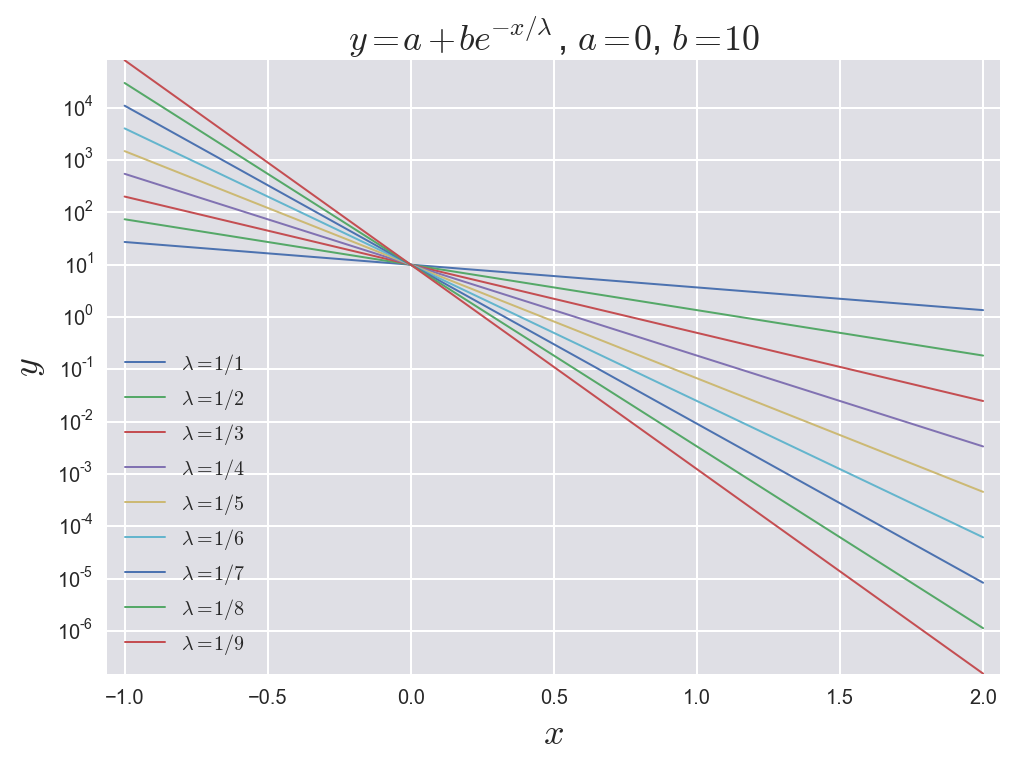

In [7]:
# Plot several lines with varying b values
# Initialise legend list
legend_list = []
for i in range(1, 10):
    plt.semilogy(x, exp_decay(np.array([0, 10, 1/i]), x))
    legend_list.append(r'$\lambda = 1/{}$'.format(str(i)))
plt.margins(x=0.02, y=0.02)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');
plt.legend(legend_list, loc='best')
plt.title('$y = a + be^{-x/\lambda}$, $a = 0$, $b = 10$')

For a = 0, the slope of a semilog plot, is $-\frac{1}{\lambda}$

## 1.2b The Cauchy distribution

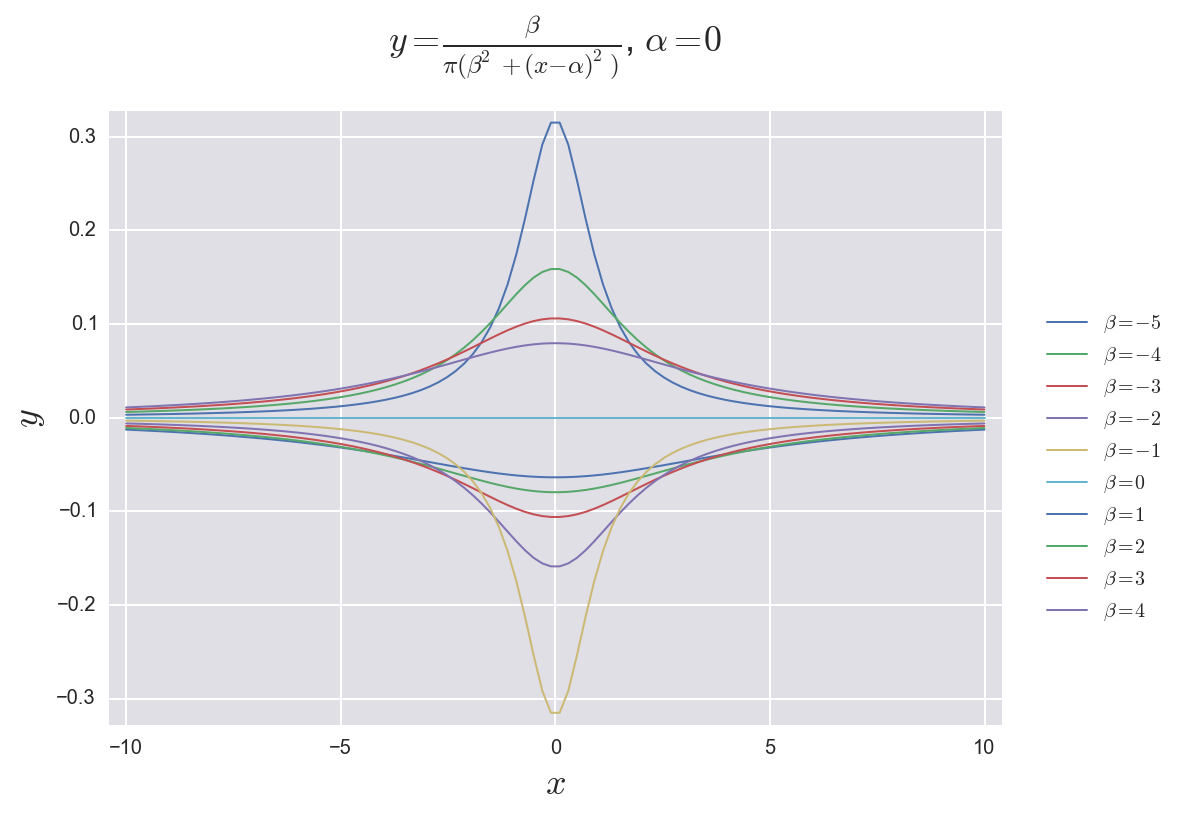

In [8]:
# 1.2b The Cauchy distribution:
# y=β/[π(β2+(x−α)2)]
def cauchy(p,x):
    '''
    Returns the value(s) of the Cauchy distribution at x
    '''
    beta, alpha = p
    return beta / (np.pi*(beta**2 + (x-alpha)**2))

# increase xrange to inspect more of function
x = np.linspace(-10.0, 10.0, 100)

# Plot several lines with varying beta values
# Initialise legend list
legend_list = []
for i in range(-5, 5):
    plt.plot(x, cauchy(np.array([i, 0]), x))
    legend_list.append(r'$\beta = {}$'.format(i))
plt.margins(x=0.02, y=0.02)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(legend_list, bbox_to_anchor=(1.2, 0.7))
plt.title(r'$y = \frac{\beta}{\pi(\beta^2+(x-\alpha)^2)}$, $\alpha = 0$', y=1.08)

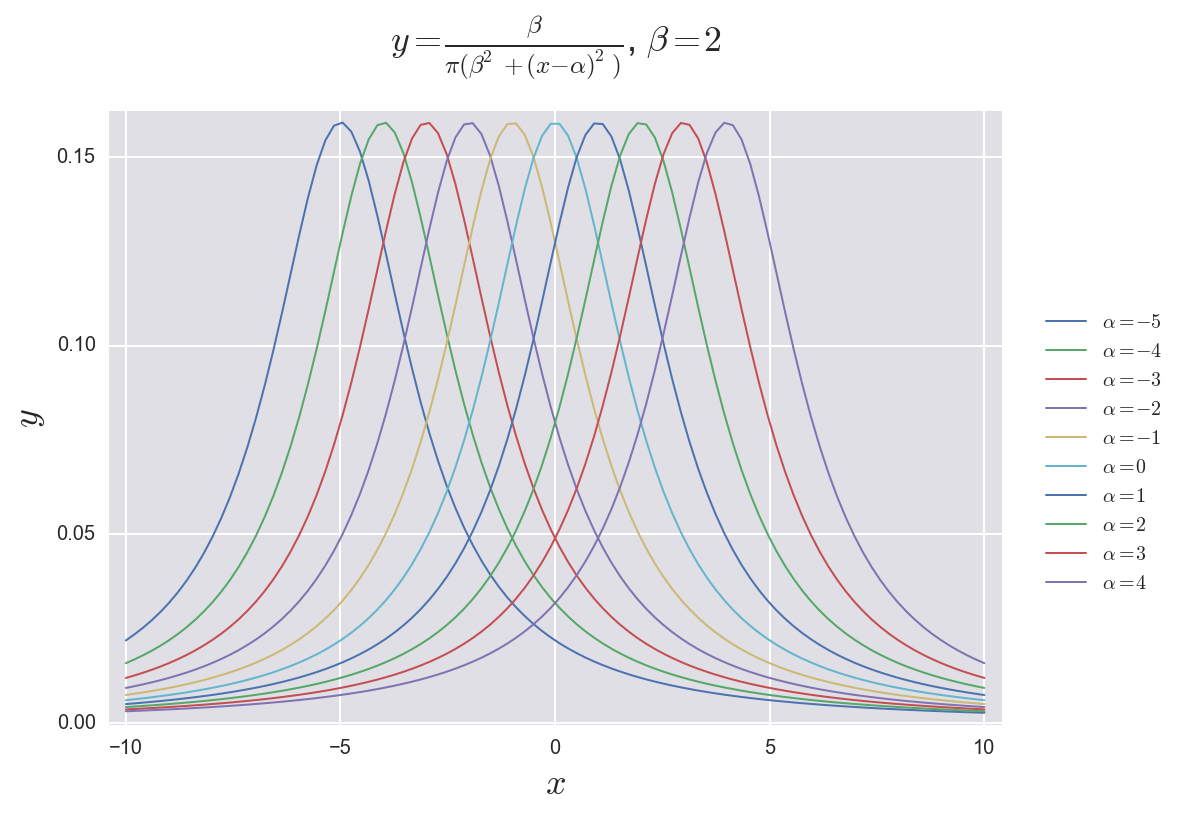

In [9]:
# Plot several lines with varying alpha values
# Initialise legend list
legend_list = []
for i in range(-5, 5):
    plt.plot(x, cauchy(np.array([2, i]), x))
    legend_list.append(r'$\alpha = {}$'.format(i))
plt.margins(x=0.02, y=0.02)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(legend_list, bbox_to_anchor=(1.2, 0.7))
plt.title(r'$y = \frac{\beta}{\pi(\beta^2+(x-\alpha)^2)}$, $\beta = 2$', y=1.08)

Changing $\beta$ adjusts y-value of peak, changing $\alpha$ adjusts x-value of peak.

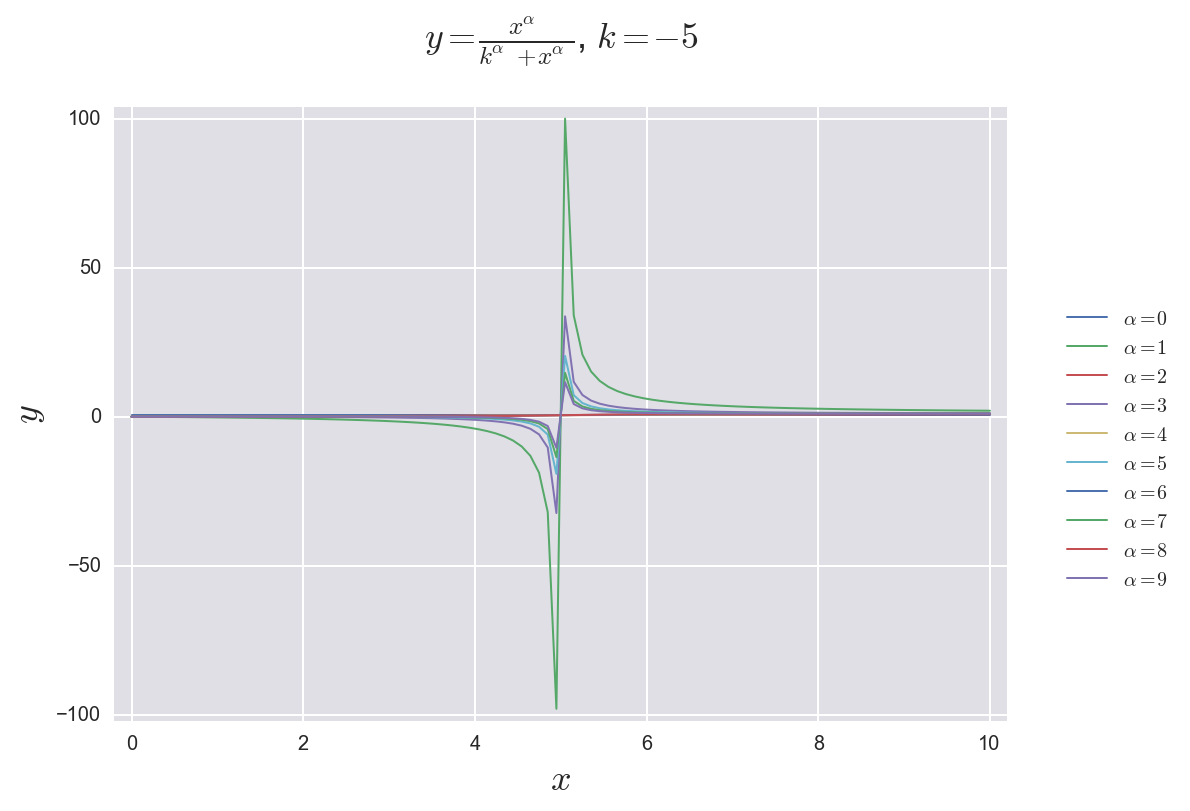

In [10]:
# 1.2c The Hill function:
# y=x**α / (k**α+x**α)
def hill(p,x):
    '''
    Returns the value(s) of the Hill function at x
    '''
    alpha, k = p
    return x**alpha / (k**alpha + x**alpha)

# decrease xrange to zoom in on interesting part of function
x = np.linspace(0, 10.0, 100)

# Plot several lines with varying alpha values
# Initialise legend list
legend_list = []
for i in range(10):
    plt.plot(x, hill(np.array([i, -5]), x))
    legend_list.append(r'$\alpha = {}$'.format(i))
plt.margins(x=0.02, y=0.02)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(legend_list, bbox_to_anchor=(1.2, 0.7))
plt.title(r'$y = \frac{x^\alpha}{k^\alpha+x^\alpha}$, $k = -5$', y=1.08)

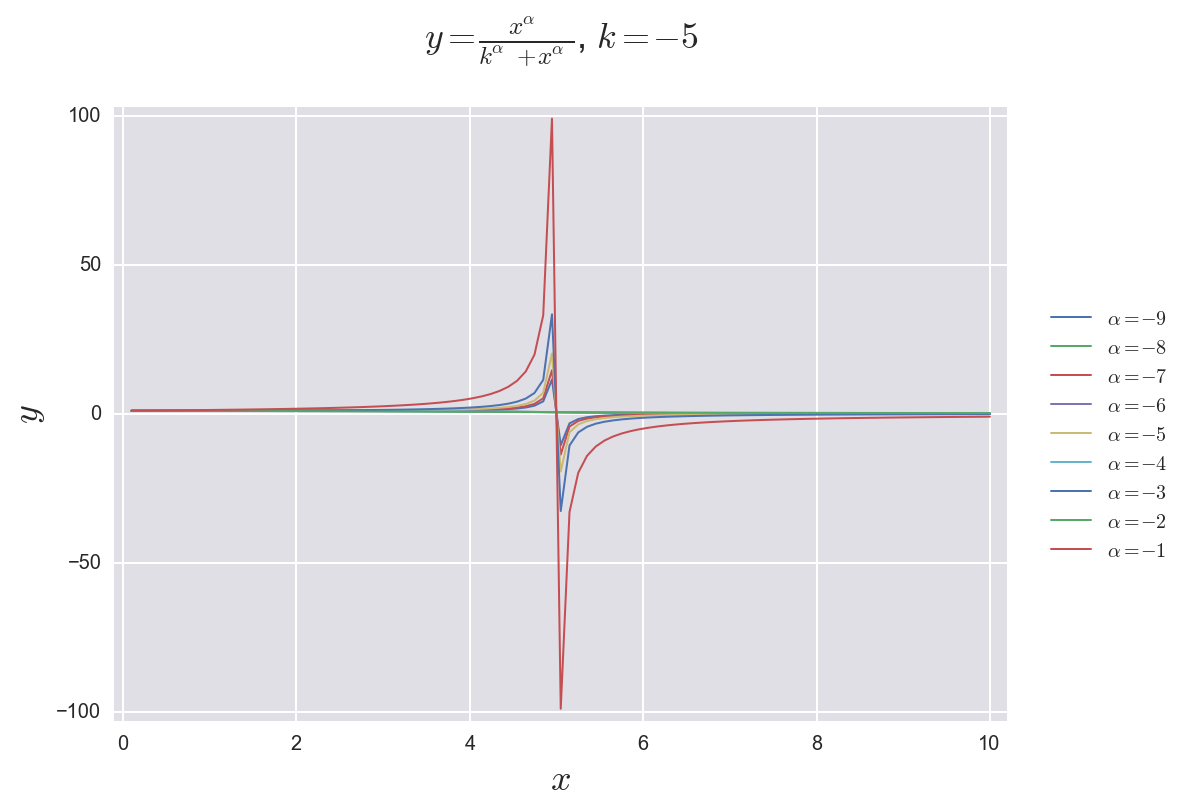

In [11]:
# Plot several lines with varying alpha values, this time negative alphas
# Initialise legend list
legend_list = []
for i in range(-9,0):
    plt.plot(x, hill(np.array([i, -5]), x))
    legend_list.append(r'$\alpha = {}$'.format(i))
plt.margins(x=0.02, y=0.02)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(legend_list, bbox_to_anchor=(1.2, 0.7))
plt.title(r'$y = \frac{x^\alpha}{k^\alpha+x^\alpha}$, $k = -5$', y=1.08)

This is a very strange function, especially for small, negative k values. I attempted to plot using a for loop, but I couldn't fit all the variety into one plot, so I made several separate ones.
alpha=-8 behaves completely differently from other nearby alpha values:
N.B. I am only using integer alpha values because non-integer alpha values can give complex solutions for negative x, k (because x^1/2 = sqrt(x))

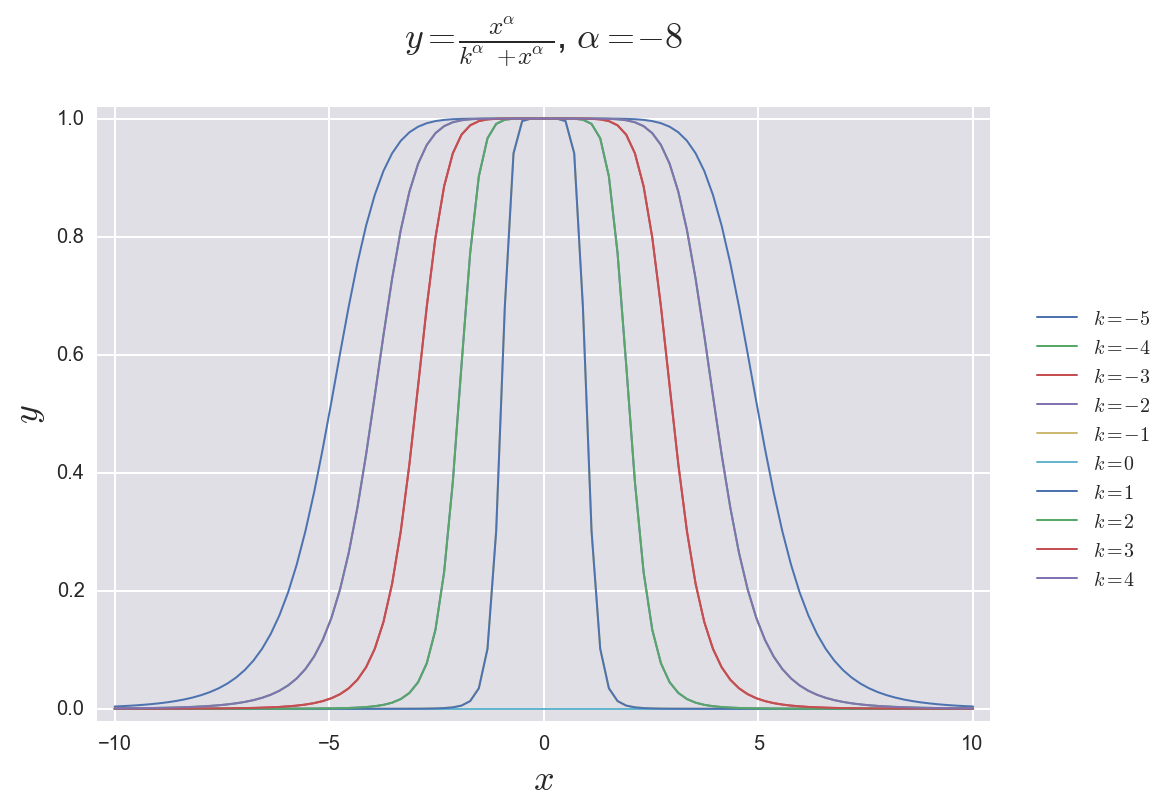

In [12]:
# Plot several lines with varying k values, alpha = -8

# xrange
x = np.linspace(-10, 10.0, 100)

# Initialise legend list
legend_list = []
for i in range(-5,5):
    plt.plot(x, hill(np.array([-8, i]), x))
    legend_list.append(r'$k = {}$'.format(i))
plt.margins(x=0.02, y=0.02)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(legend_list, bbox_to_anchor=(1.2, 0.7))
plt.title(r'$y = \frac{x^\alpha}{k^\alpha+x^\alpha}$, $\alpha = -8$', y=1.08)

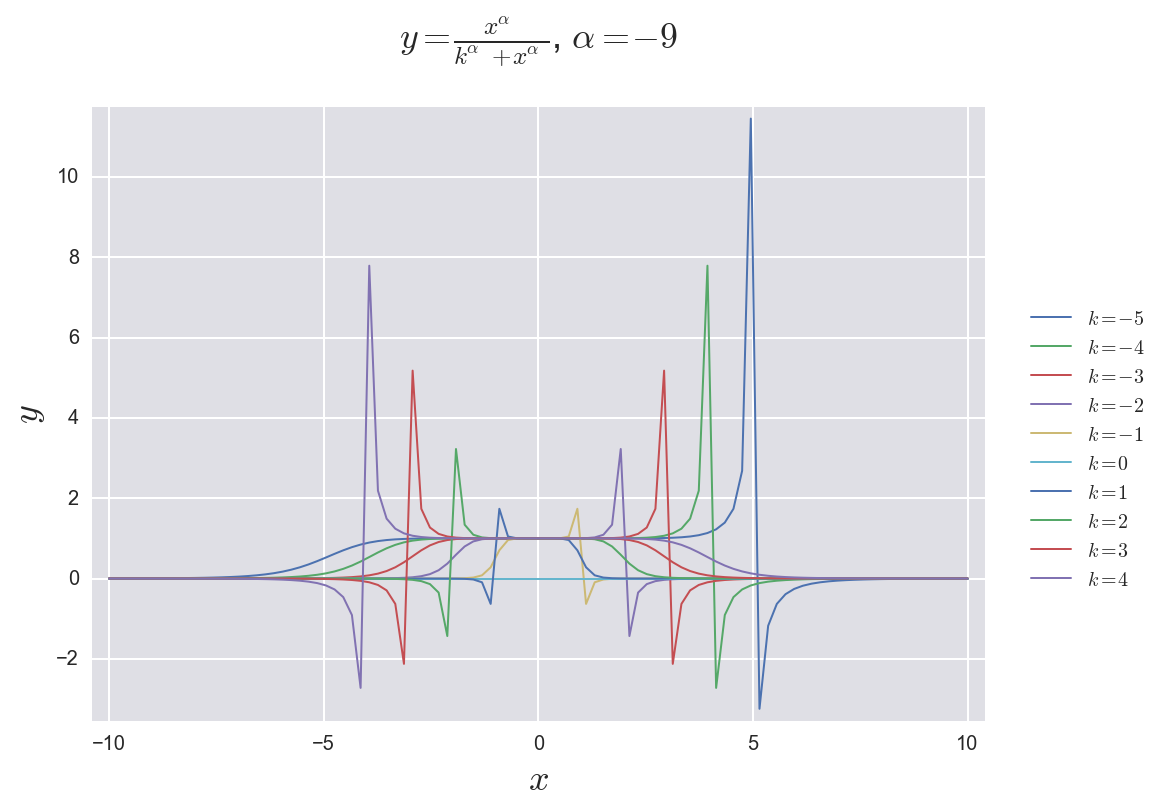

In [15]:
# Initialise legend list
legend_list = []
for i in range(-5,5):
    plt.plot(x, hill(np.array([-9, i]), x))
    legend_list.append(r'$k = {}$'.format(i))
plt.margins(x=0.02, y=0.02)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(legend_list, bbox_to_anchor=(1.2, 0.7))
plt.title(r'$y = \frac{x^\alpha}{k^\alpha+x^\alpha}$, $\alpha = -9$', y=1.08)

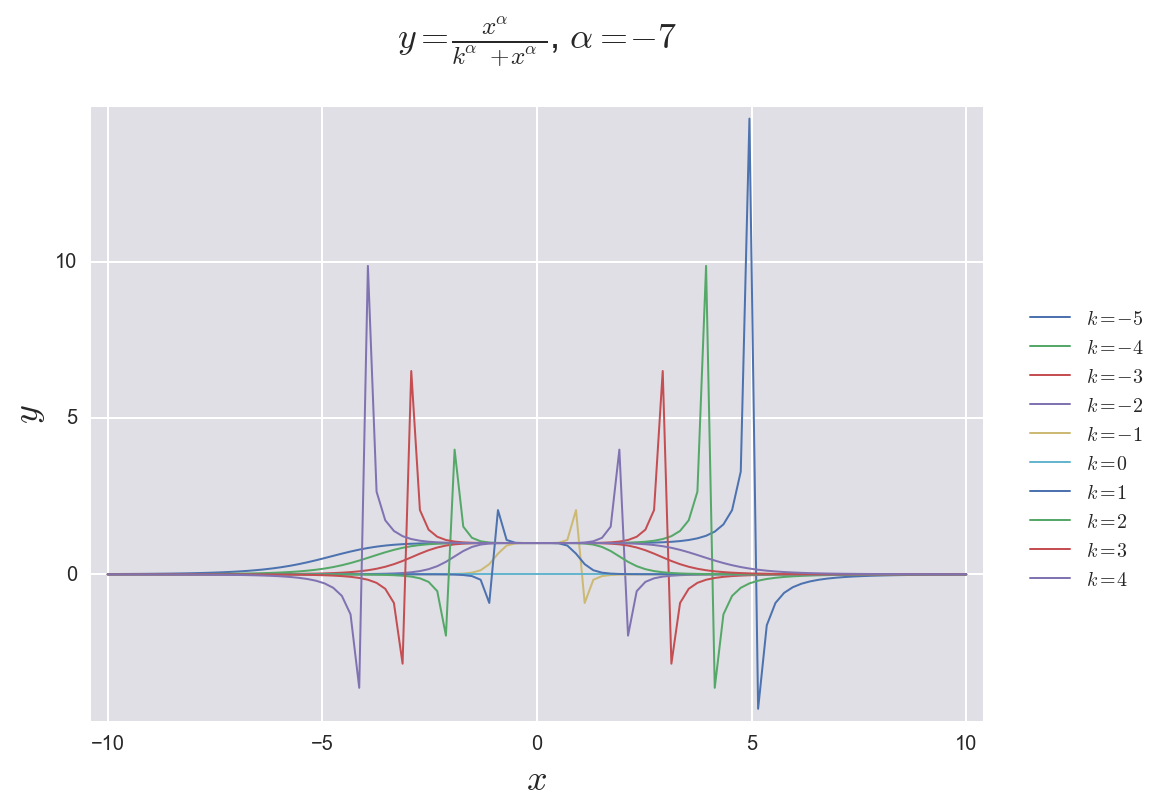

In [16]:
# Initialise legend list
legend_list = []
for i in range(-5,5):
    plt.plot(x, hill(np.array([-7, i]), x))
    legend_list.append(r'$k = {}$'.format(i))
plt.margins(x=0.02, y=0.02)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(legend_list, bbox_to_anchor=(1.2, 0.7))
plt.title(r'$y = \frac{x^\alpha}{k^\alpha+x^\alpha}$, $\alpha = -7$', y=1.08)